In [29]:
import numpy as np
import pandas as pd
import keras
from keras import layers
from keras import ops
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
 # fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [30]:
# X = np.load('X_total_ceew.npy')
X = np.load('Xmeterav_total_ceew.npy')
# X = np.load('/content/drive/My Drive/Colab/EI_conf/DeepLearn/X_total_ceew.npy')

In [31]:
X1 = X
X2 = X1.reshape((X1.shape[0], X1.shape[1], 1))
X2.shape

(84, 24, 1)

In [32]:
n_clusters = 4

In [33]:
#TS learn
X2a = TimeSeriesScalerMeanVariance().fit_transform(X2)
ksc = KShape(n_clusters=n_clusters, verbose=False, random_state=2)
ksc.fit(X2a)
labels = ksc.labels_
ksc.cluster_centers_.shape
cluster_centroids = ksc.cluster_centers_

In [34]:
for i in range(n_clusters):
    num_points_in_cluster = len(X2a[labels == i])
    print(f"Cluster {i}: {num_points_in_cluster} data points")

Cluster 0: 34 data points
Cluster 1: 15 data points
Cluster 2: 16 data points
Cluster 3: 19 data points


In [35]:
xc = cluster_centroids
xc1 = xc.reshape((xc.shape[0], xc.shape[1]))
df_c = pd.DataFrame(xc1)

In [36]:
df_c

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.199078,-1.253757,-1.451795,-1.510253,-1.596261,-1.105353,0.589381,2.590125,1.893182,0.905953,...,0.037941,-0.019264,-0.029528,0.140790,0.339278,0.306806,0.112616,-0.081824,-0.351130,-0.236148
1,0.238488,-0.062088,-0.306579,-0.518978,-1.078873,-1.346582,-1.115798,-0.345603,-0.214792,-0.021824,...,-0.596122,-1.554674,-1.461793,-0.447508,1.397575,2.348671,2.151989,0.952020,0.233273,-0.008311
2,-0.454132,-0.807874,-1.341570,-1.702815,-1.305613,-0.738382,-0.338270,-0.484211,-0.357164,-0.140132,...,0.315202,1.339798,2.177815,2.127096,1.766911,0.853117,0.378655,0.093768,0.012036,-0.108382
3,2.576057,2.256535,0.853515,-0.070674,-0.654588,-0.800070,-0.854187,-0.938452,-1.071820,-0.928900,...,-0.908960,-0.756614,-0.343233,0.116919,0.480425,0.936379,1.290474,0.909723,0.257530,0.153630


<Axes: >

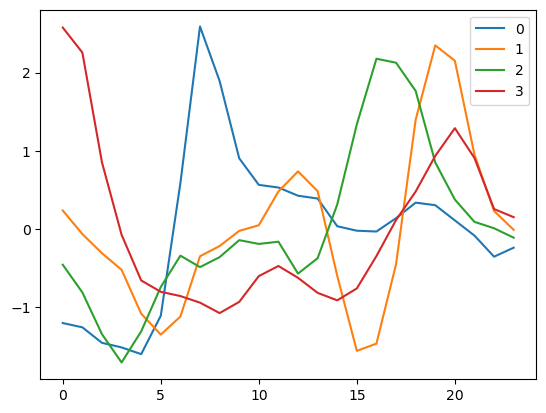

In [37]:
df_c.T.plot()

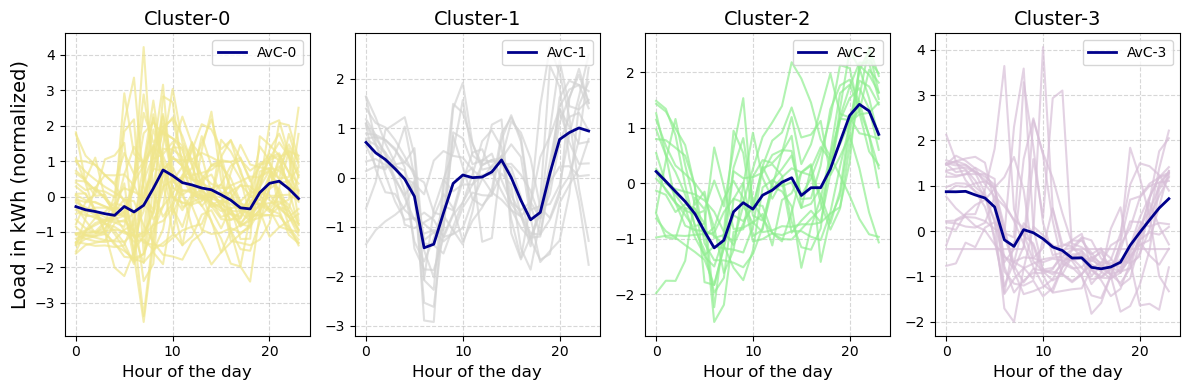

In [38]:
plt.figure(figsize=(12,4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2a.reshape((X2a.shape[0], X2a.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh (normalized)', fontsize=14)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids

plt.tight_layout()
# plt.savefig("kshape_cseg_norm.pdf", format='pdf', bbox_inches='tight')

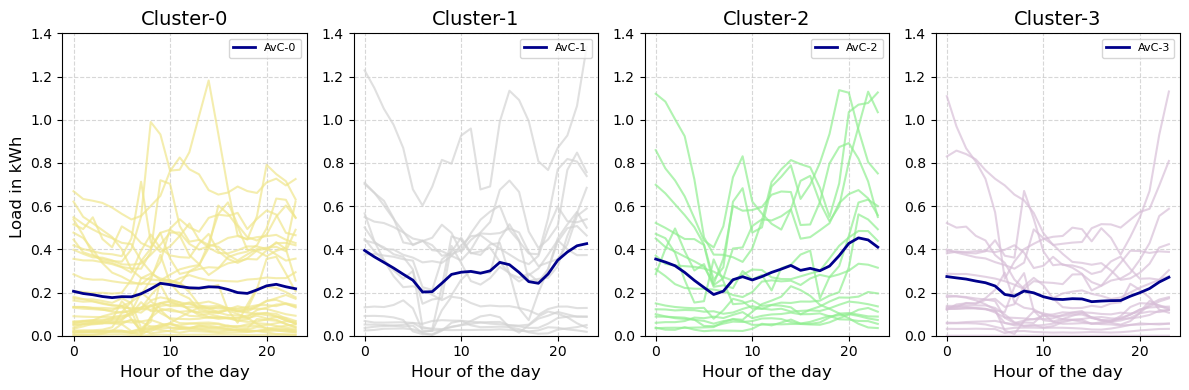

In [58]:
plt.figure(figsize=(12,4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X1.reshape((X2a.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh ', fontsize=12)  # Add ylabel only for the leftmost plot
    ax.set_ylim(0, 1.4)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("kshape_cseg_orgscale_single.pdf", format='pdf', bbox_inches='tight')

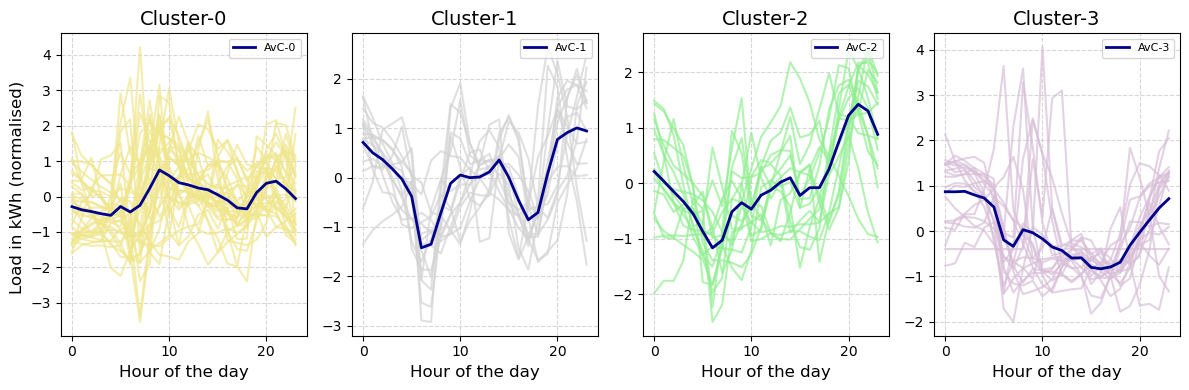

In [40]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2 = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh (normalised) ', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 4)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
# plt.savefig("norm_kshape_cseg.pdf", format='pdf', bbox_inches='tight')

In [41]:
X1.shape

(84, 24)

In [42]:
X1

array([[0.04781174, 0.05289242, 0.05247922, ..., 0.0882445 , 0.07154279,
        0.0571956 ],
       [1.12014658, 1.08372964, 1.00239739, ..., 1.06982736, 1.07753094,
        1.12614984],
       [0.16288624, 0.15741534, 0.15941799, ..., 0.17360053, 0.18876984,
        0.17111905],
       ...,
       [0.18041012, 0.1697801 , 0.15896859, ..., 0.36536126, 0.28737347,
        0.20555846],
       [1.2284    , 1.14777313, 1.05054627, ..., 0.92713881, 1.06415373,
        1.33738657],
       [0.06446244, 0.06430986, 0.06342254, ..., 0.05797418, 0.0668169 ,
        0.06571831]])

In [43]:
labels = ksc.fit_predict(X2b)
labels

array([0, 2, 0, 0, 3, 2, 3, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 3, 0, 3, 1, 3,
       3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 3, 1, 0, 3, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 2, 3, 0, 3, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 2, 0,
       1, 2, 3, 2, 2, 3, 2, 3, 3, 1, 0, 3, 0, 2, 3, 0, 1, 0], dtype=int64)

In [44]:
from tslearn.metrics import cdist_dtw
from tslearn.metrics import dtw
from sklearn.metrics import silhouette_score
silhouette_score(X, labels, metric=dtw)
silhouette_score(X, ksc.fit_predict(X2b))

-0.09475997913096183

In [45]:
 silhouette_score(X, labels, metric=dtw)  

-0.10704142403936343

In [46]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, ksc.fit_predict(X2b))

1.9269913933489793

In [47]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, ksc.fit_predict(X2b))

9.14091219667668

In [48]:
#SBD
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(np.mean(X1[labels == j],axis=0), X1[labels == j][i,:])
        
print(k)

24.368199653139868


In [49]:
#PMS with mean

y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(np.mean(X[labels == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

16.0 0.19047619047619047


In [54]:
dmd_pk = np.load('dmd_pk.npy')
from sklearn.metrics.pairwise import euclidean_distances


0 [[14.35424056]] 14.271815282297108 0.13280280478441076
1 [[18.2136336]] 18.213633597291846 0.4208016635854387
2 [[15.91071728]] 15.910717282389312 0.4063501144404802
3 [[21.00703975]] 21.007039754696322 0.5143516039857309


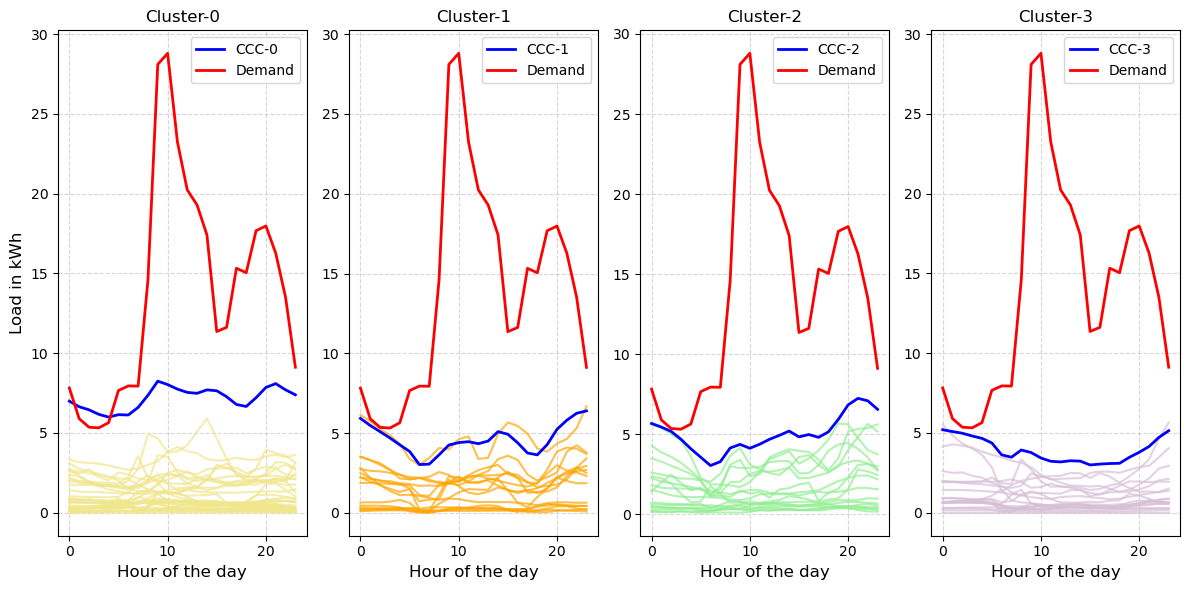

In [59]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming cluster_assignments_scaled, cluster_centers_scaled, and X are defined

plt.figure(figsize=(12, 6))

colors = ['khaki', 'orange', '#90EE90', 'thistle']  # Different color combinations

for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=12)
    
    x1 = X1[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    
    plt.plot(x2*5, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x4, linewidth=2, color='blue', alpha=1, label=f'CCC-{i}')  # Cluster centroids with label
#     plt.plot(x3*5, linewidth=2, color='darkblue', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(dmd_pk,linewidth = 2, color='red', label ='Demand')
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids
    x4_array = np.array(x4[20:24]).reshape(-1, 1).T
    dmd_pk_array = np.array(dmd_pk[20:24]).reshape(-1, 1).T
    distances = euclidean_distances(x4_array, dmd_pk_array)
    sbdist = sbd_distance(x4_array, dmd_pk_array)
    print(i, distances,dtw(dmd_pk[20:24],x4[20:24]),sbdist)
plt.tight_layout()

# Save as PDF
plt.savefig("cc_kshape.pdf", format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
X2b[labels == 1][0,:]

In [ ]:
xc[1, :].T.shape

In [ ]:

X2b[labels == 0][0,:].reshape(1,-1).shape

In [ ]:
#Shape based distance
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(xc[j, :].T, X2b[labels == j][i,:].reshape(1,-1))
print(k)

In [ ]:
peaks_indices = np.argmax(x4) 
peak_rlc = np.argmax(dmd_pk, axis=0)

In [ ]:
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(np.mean(X[labels == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

In [ ]:
peak_dem = np.argmax(dmd_pk, axis=0)

In [ ]:
peaks_indices

In [ ]:
def arsum(arr):
    n = len(arr)
    sum = 0
    for element in arr:
        sum+=element
    return sum

In [ ]:
dmd_pk=X.sum(axis=0).T
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pms = np. zeros((n_clusters,1))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    
    x1 = X1[labels == j]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
    peak_dem = np.argmax(dmd_pk, axis=0)
    c[j,peak_dem] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        pms[j,:] = pms[j,:] + np.dot(c[j,:],y[i+l,:])/len(X[labels == j])
#         print(len(X[labels == j]))
    l = l + len(X[labels == j])
#     print(peaks_indices,pm)
print(pm)
print(pms)

In [ ]:
y[1,peaks_indices[:]]